# Read the data

In [2]:
import pandas as pd
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']])
df.shape

(9471, 16)

In [3]:
df.head(3)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN


In [4]:
# Extract only the required columns
df_act = df[['Date_Time', 'CO(GT)']].copy(deep=True)
df_act.tail(3)

,Date_Time,CO(GT)
9468,nan nan,NaN
9469,nan nan,NaN
9470,nan nan,NaN


In [5]:
#check for missing values
Temp = pd.DataFrame(df_act.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 1


In [6]:
df_act = df_act.fillna(df_act['CO(GT)'].mean())

In [7]:
# df_act = df_act.dropna(how='any',axis=0) 
df_act.drop(df_act[df_act['Date_Time'] == 'nan nan'].index, inplace = True) 
df_act.shape

(9357, 2)

In [8]:
from datetime import datetime
df_act['Date_Time'] = pd.to_datetime(df_act['Date_Time'], format = '%d/%m/%Y %H.%M.%S')
# df_act['Date_Time'] = datetime.strptime(df_act['Date_Time'], "%d/%m/%Y %H.%M.%S")

In [9]:
df_act.head()

,Date_Time,CO(GT)
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [10]:
df_act = df_act.set_index('Date_Time')
df_act.head(3)

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2


In [11]:
type(df_act.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(df_act.iloc[0:200])
plt.show()

<Figure size 1500x700 with 1 Axes>

## Stationarity Test - Dickey Fuller

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    data1 = timeseries.iloc[:,0].values
    dftest = adfuller(data1, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

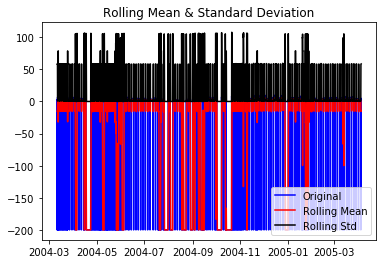

Results of Dickey-Fuller Test:
Test Statistic                -9.552225e+00
p-value                        2.553762e-16
#Lags Used                     2.800000e+01
Number of Observations Used    9.328000e+03
Critical Value (1%)           -3.431051e+00
Critical Value (5%)           -2.861850e+00
Critical Value (10%)          -2.566935e+00
dtype: float64


In [14]:
test_stationarity(df_act)

In [15]:
df_act = df_act + 201
df_act.head(3)

,CO(GT)
Date_Time,
2004-03-10 18:00:00,203.6
2004-03-10 19:00:00,203.0
2004-03-10 20:00:00,203.2


In [17]:
import numpy as np
df_act_log = np.log(df_act)
df_act_log.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,5.316157
2004-03-10 19:00:00,5.313206
2004-03-10 20:00:00,5.314191
2004-03-10 21:00:00,5.314191
2004-03-10 22:00:00,5.311234


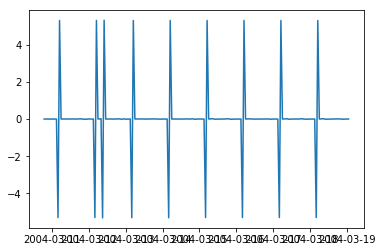

In [19]:
df_log_diff = df_act_log - df_act_log.shift()
plt.plot(df_log_diff.head(200))
plt.show()

In [24]:
df_log_diff.head()

,CO(GT)
Date_Time,
2004-03-10 18:00:00,NaN
2004-03-10 19:00:00,-0.002951
2004-03-10 20:00:00,0.000985
2004-03-10 21:00:00,0.000000
2004-03-10 22:00:00,-0.002957


In [28]:
df_log_diff.dropna(how='any', axis = 0, inplace=True)
df_log_diff.head()

,CO(GT)
Date_Time,
2004-03-10 19:00:00,-0.002951
2004-03-10 20:00:00,0.000985
2004-03-10 21:00:00,0.000000
2004-03-10 22:00:00,-0.002957
2004-03-10 23:00:00,-0.001976


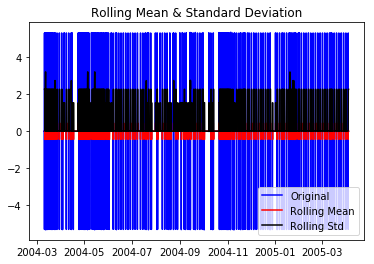

Results of Dickey-Fuller Test:
Test Statistic                  -19.668500
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    9322.000000
Critical Value (1%)              -3.431052
Critical Value (5%)              -2.861850
Critical Value (10%)             -2.566935
dtype: float64


In [29]:
test_stationarity(df_log_diff)

In [30]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [31]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

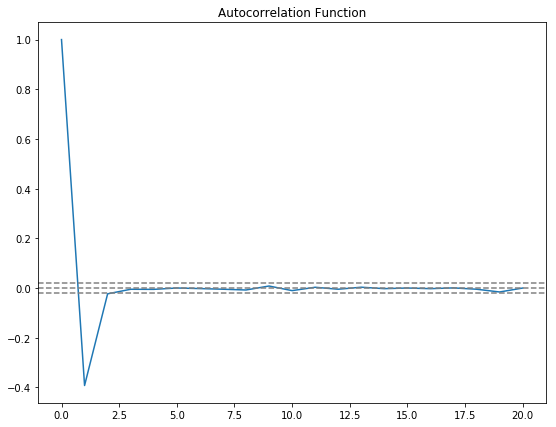

In [35]:
#Plot ACF: 
import numpy as np
plt.figure(figsize=(20,7))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

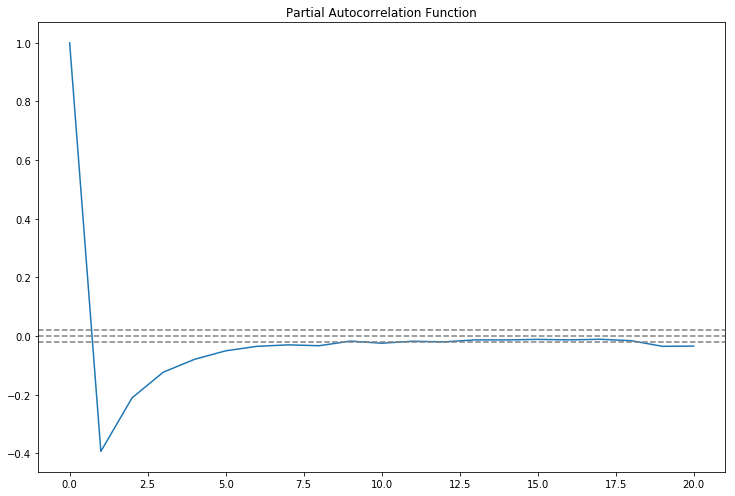

In [36]:
#Plot PACF:
plt.figure(figsize=(20,7))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [37]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

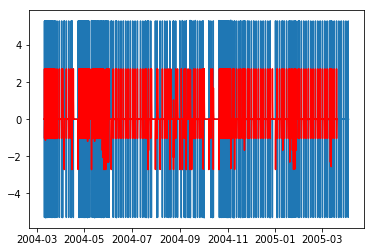

In [39]:
model = ARIMA(df_log_diff.head(9000), order=(1, 0, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_diff)**2))

In [40]:
model.predict(df_log_diff.tail(5))

ValueError: non-broadcastable output operand with shape (9000,) doesn't match the broadcast shape (9000,9000)

In [42]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 CO(GT)   No. Observations:                 9000
Model:                     ARMA(1, 1)   Log Likelihood              -12302.464
Method:                       css-mle   S.D. of innovations              0.949
Date:                Fri, 27 Sep 2019   AIC                          24612.928
Time:                        08:22:17   BIC                          24641.348
Sample:                    03-10-2004   HQIC                         24622.598
                         - 03-20-2005                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.001e-06      0.004      0.000      1.000      -0.008       0.008
ar.L1.CO(GT)     0.1054      0.021      5.079      0.000       0.065       0.146
ma.L1.CO(GT)    -0.6172      0.017    -36.449      0.000      -0.650      -0.584
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.4878           +0.0000j            9.4878            0.0000
MA.1            1.6203           +0.0000j            1.6203            0.0000
-----------------------------------------------------------------------------
"""

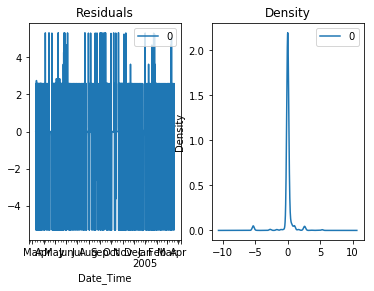

In [43]:
# Plot residual errors
residuals = pd.DataFrame(results_AR.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Figure size 1800x1224 with 0 Axes>

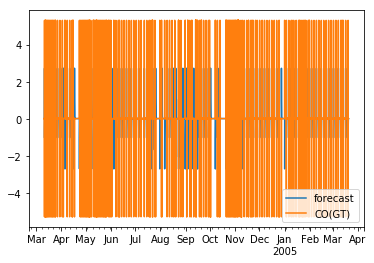

In [48]:
# Actual vs Fitted
plt.figure(figsize=(25,17))
results_AR.plot_predict(dynamic=False)
plt.show()

In [50]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_log_diff[:9000]
test = df_log_diff[9000:]

In [78]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit(disp=-1)  

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [79]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 CO(GT)   No. Observations:                 9000
Model:                     ARMA(2, 1)   Log Likelihood              -12299.036
Method:                       css-mle   S.D. of innovations              0.949
Date:                Fri, 27 Sep 2019   AIC                          24608.072
Time:                        08:42:10   BIC                          24643.597
Sample:                    03-10-2004   HQIC                         24620.161
                         - 03-20-2005                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.236e-06      0.004      0.001      1.000      -0.008       0.008
ar.L1.CO(GT)     0.1691      0.030      5.561      0.000       0.109       0.229
ar.L2.CO(GT)     0.0509      0.019      2.618      0.009       0.013       0.089
ma.L1.CO(GT)    -0.6823      0.028    -24.345      0.000      -0.737      -0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0717           +0.0000j            3.0717            0.0000
AR.2           -6.3902           +0.0000j            6.3902            0.5000
MA.1            1.4656           +0.0000j            1.4656            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
# Forecast
fc, se, conf = fitted.forecast(356, alpha=0.05)  # 95% conf
fc

array([-6.29067696e-03, -9.86325827e-04, -4.85489037e-04, -1.30583374e-04,
       -4.50663366e-05, -1.25276889e-05, -2.66988123e-06,  6.54411788e-07,
        1.71863941e-06,  2.06791923e-06,  2.18118731e-06,  2.21813105e-06,
        2.23014739e-06,  2.23406103e-06,  2.23533486e-06,  2.23574960e-06,
        2.23588461e-06,  2.23592857e-06,  2.23594288e-06,  2.23594754e-06,
        2.23594905e-06,  2.23594955e-06,  2.23594971e-06,  2.23594976e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  2.23594978e-06,  2.23594978e-06,  2.23594978e-06,
        2.23594978e-06,  

In [81]:
test

,CO(GT)
Date_Time,
2005-03-20 19:00:00,0.005903
2005-03-20 20:00:00,0.005380
2005-03-20 21:00:00,0.000000
2005-03-20 22:00:00,-0.010297
2005-03-20 23:00:00,-0.001973
2005-03-21 00:00:00,0.000000
2005-03-21 01:00:00,0.000494
2005-03-21 02:00:00,-0.002471
2005-03-21 03:00:00,-0.001486


In [73]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

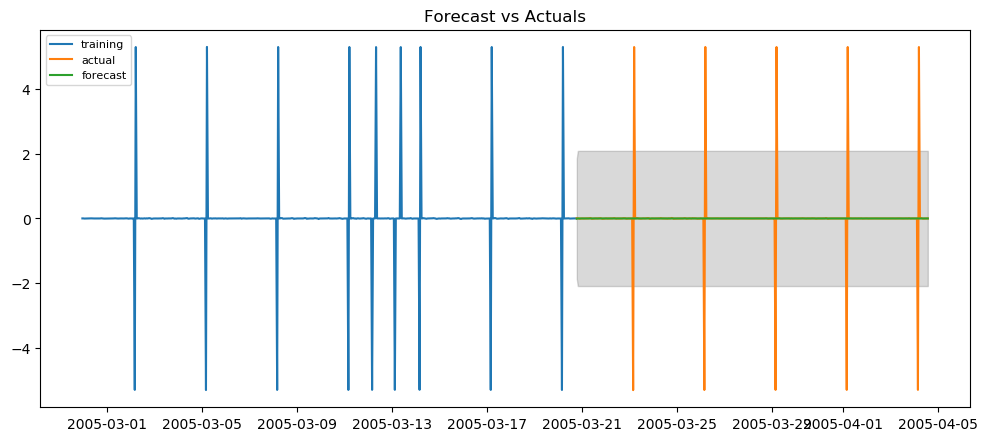

In [82]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[8500:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()